In [260]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [261]:
# Import data of type string from the train and test dataset 
data_train = np.loadtxt('training.txt', delimiter=' ', dtype=np.str, usecols=(0,1,3,4,6,7), skiprows=1)
data_test = np.loadtxt('testing.txt', delimiter=' ', dtype=np.str, usecols=(0,1,3,4,6,7), skiprows=1)

In [262]:
# Import numeric data from the train and test dataset
data_train_num = np.loadtxt('training.txt', delimiter=' ', dtype=np.int, usecols=(2,5), skiprows=1)
data_test_num = np.loadtxt('testing.txt', delimiter=' ', dtype=np.int, usecols=(2,5), skiprows=1)

In [266]:
# Split x and y values
x_train = data_train[:,1:]
y_train = data_train[:,0]
x_test = data_test[:,1:]
y_test = data_test[:,0]

In [265]:
print(x_train.shape)
print(data_train_num.shape)

(702, 5)
(702, 2)


In [267]:
# Normalize numeric values
scaler = MinMaxScaler()
data_train_num = scaler.fit_transform(data_train_num)
data_test_num = scaler.fit_transform(data_test_num)

In [268]:
# Assign a positive float value to each category
categories = [list(np.unique(x_train[:,i])) for i in range(x_train.shape[1])]
a = dict()
for category in categories:
    for c in category:
        a[c] = np.abs(np.random.normal(0,1))
a

{'"bad.running"': 0.44066255367086776,
 '"good.running"': 0.5634481726980438,
 '"no"': 1.121105221275482,
 '"pre.bad"': 0.1912730854004171,
 '"pre.good"': 2.228995487816058,
 '"personal"': 0.5765152188436177,
 '"professional"': 0.6845505306282164,
 '"man"': 0.3247575325953141,
 '"woman"': 0.45903846618915994,
 '"alone"': 1.0587937955073752,
 '"not.alone"': 0.5066821875380998}

In [270]:
# Encode categories to floats
def prepare_input(X):
    X_enc = np.ones((X.shape[0], X.shape[1]))
    for i in range(X.shape[1]):
        for key, value in a.items():
            mask = np.where(X[:,i] == key)
            X_enc[mask,i] = value
    return X_enc

In [269]:
# encode y values to binary
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [271]:
X_train_enc = prepare_input(x_train)
X_test_enc = prepare_input(x_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [272]:
print(X_train_enc.shape)
print(data_train_num.shape)

(702, 5)
(702, 2)


In [273]:
# Stack the categorical and numerical data
X_train_enc = np.column_stack((X_train_enc,data_train_num))
X_test_enc =  np.column_stack((X_test_enc,data_test_num))

In [274]:
print(X_train_enc.shape)
print(X_test_enc.shape)

(702, 7)
(298, 7)


In [282]:
model = Sequential([
    Dense(32, kernel_initializer='glorot_normal'),
    BatchNormalization(),
    Activation('relu'),
    Dense(1, activation='sigmoid')
])

In [283]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [284]:
history = model.fit(X_train_enc, y_train_enc,
          batch_size=128,
          epochs=60,
          validation_data=(X_test_enc, y_test_enc), verbose=1)

Train on 702 samples, validate on 298 samples
Epoch 1/60
702/702 [==============================] - 2s 3ms/step - loss: 1.1516 - acc: 0.2678 - val_loss: 1.0655 - val_acc: 0.3087
Epoch 2/60
702/702 [==============================] - 0s 41us/step - loss: 1.0936 - acc: 0.2607 - val_loss: 1.0485 - val_acc: 0.3087
Epoch 3/60
702/702 [==============================] - 0s 78us/step - loss: 1.0360 - acc: 0.2664 - val_loss: 1.0292 - val_acc: 0.3087
Epoch 4/60
702/702 [==============================] - 0s 37us/step - loss: 0.9900 - acc: 0.2650 - val_loss: 1.0080 - val_acc: 0.3121
Epoch 5/60
702/702 [==============================] - 0s 44us/step - loss: 0.9410 - acc: 0.2678 - val_loss: 0.9830 - val_acc: 0.3087
Epoch 6/60
702/702 [==============================] - 0s 62us/step - loss: 0.8949 - acc: 0.2678 - val_loss: 0.9650 - val_acc: 0.3121
Epoch 7/60
702/702 [==============================] - 0s 47us/step - loss: 0.8609 - acc: 0.2721 - val_loss: 0.9410 - val_acc: 0.3087
Epoch 8/60
702/702 [====

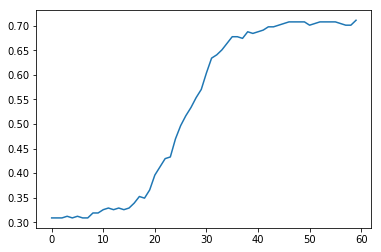

In [285]:
plt.plot(history.history['val_acc'])

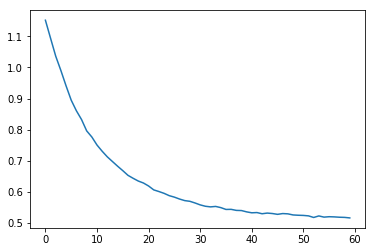

In [286]:
plt.plot(history.history['loss'])